In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


In [14]:
base_path = "data\\autism-detect-new"
categories = ["asd", "non_asd"]

image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(base_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)  

df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

In [16]:
df

,image_path,label
0,data\autism-detect-new\asd\asd_original_TS001_...,asd
1,data\autism-detect-new\asd\asd_original_TS001_...,asd
2,data\autism-detect-new\asd\asd_original_TS001_...,asd
3,data\autism-detect-new\asd\asd_original_TS001_...,asd
4,data\autism-detect-new\asd\asd_original_TS002_...,asd
...,...,...
3934,data\autism-detect-new\non_asd\non_asd_origina...,non_asd
3935,data\autism-detect-new\non_asd\non_asd_origina...,non_asd
3936,data\autism-detect-new\non_asd\non_asd_origina...,non_asd
3937,data\autism-detect-new\non_asd\non_asd_origina...,non_asd


In [18]:
df.shape

(3939, 2)

In [20]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [22]:
df.duplicated().sum()

0

In [24]:
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [26]:
df['label'].unique()

array(['asd', 'non_asd'], dtype=object)

In [28]:
df['label'].value_counts()

label
asd        1971
non_asd    1968
Name: count, dtype: int64

C:\Users\ashis\AppData\Local\Temp\ipykernel_8888\3770576852.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="viridis")


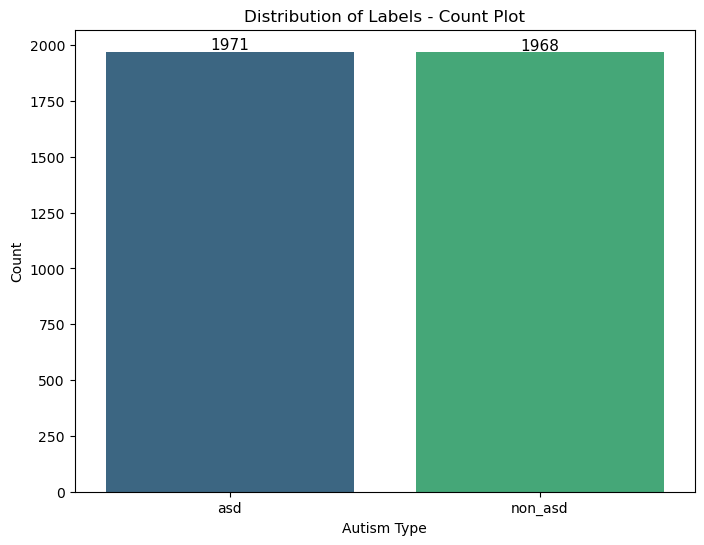

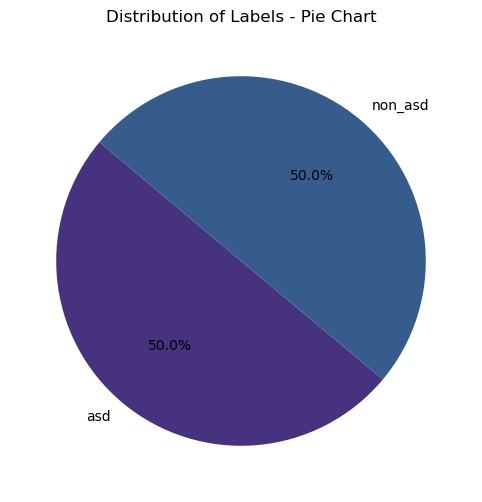

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="label", palette="viridis")
plt.title("Distribution of Labels - Count Plot")
plt.xlabel("Autism Type")
plt.ylabel("Count")

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.show()

label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title("Distribution of Labels - Pie Chart")
plt.show()

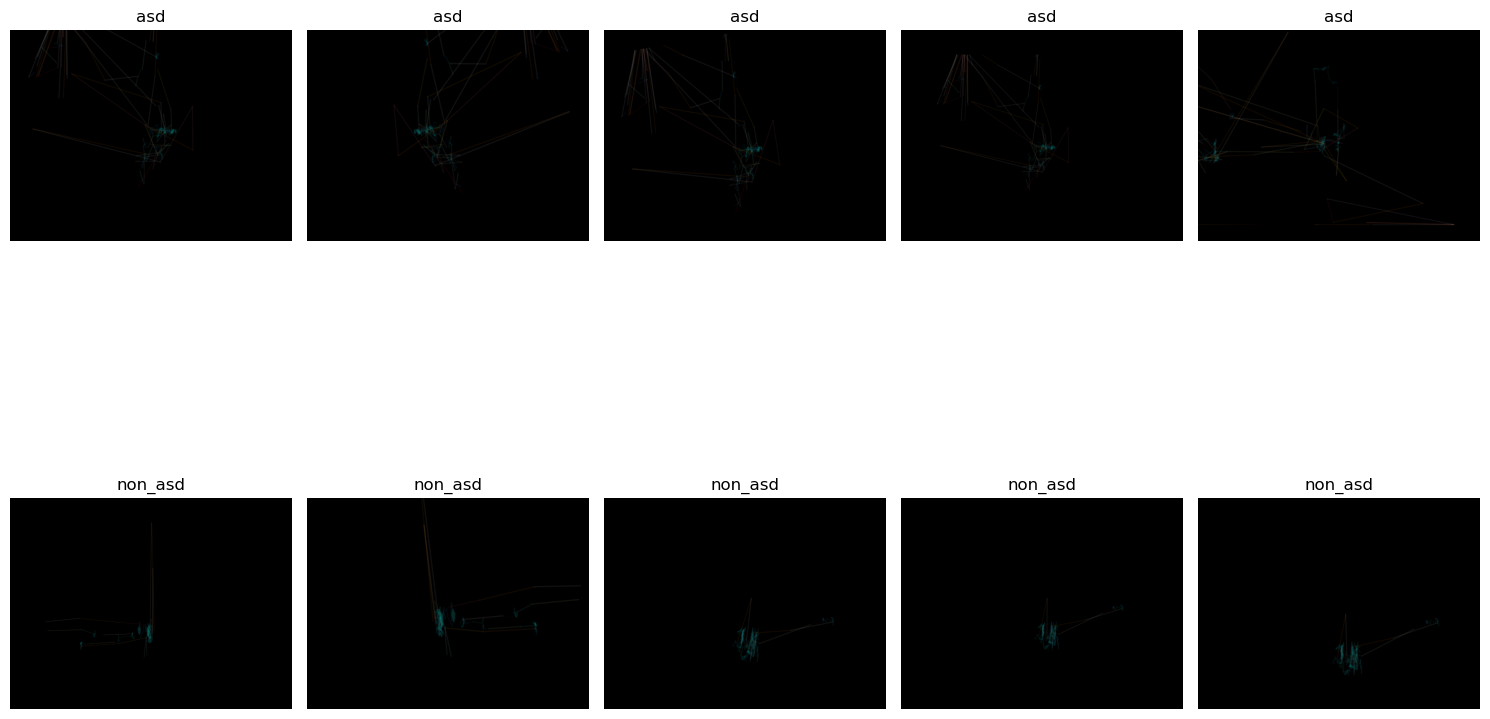

In [31]:
import cv2

num_images = 5

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()

In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [33]:
df = df[['image_path', 'category_encoded']]

In [34]:
from imblearn.over_sampling import RandomOverSampler

In [40]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])

In [42]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled

In [44]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
0    1971
1    1971
Name: count, dtype: int64


In [46]:
df_resampled

,image_path,category_encoded
0,data\autism-detect-new\asd\asd_original_TS001_...,0
1,data\autism-detect-new\asd\asd_original_TS001_...,0
2,data\autism-detect-new\asd\asd_original_TS001_...,0
3,data\autism-detect-new\asd\asd_original_TS001_...,0
4,data\autism-detect-new\asd\asd_original_TS002_...,0
...,...,...
3937,data\autism-detect-new\non_asd\non_asd_origina...,1
3938,data\autism-detect-new\non_asd\non_asd_origina...,1
3939,data\autism-detect-new\non_asd\non_asd_origina...,1
3940,data\autism-detect-new\non_asd\non_asd_origina...,1


In [48]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [49]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [52]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded'] 
)

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3 
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path', 
    y_col='category_encoded',    
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 3153 validated image filenames belonging to 2 classes.
Found 394 validated image filenames belonging to 2 classes.
Found 395 validated image filenames belonging to 2 classes.


In [56]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using CPU


In [60]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [62]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, BatchNormalization,
                                     GaussianNoise, Input, Reshape)
from tensorflow.keras.optimizers import Adam

class DifferentialAttention(tf.keras.layers.Layer):
    def __init__(self, num_heads, key_dim):
        super(DifferentialAttention, self).__init__()
        self.num_heads = num_heads
        self.key_dim = key_dim
        
    def build(self, input_shape):
        self.query_dense = tf.keras.layers.Dense(self.key_dim)
        self.key_dense = tf.keras.layers.Dense(self.key_dim)
        self.value_dense = tf.keras.layers.Dense(self.key_dim)

    def call(self, x):
      
        Q = self.query_dense(x)
        K = self.key_dense(x)
        V = self.value_dense(x)
        
        
        attention_scores = tf.einsum('...ij,...kj->...ik', Q, K)  
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)  
        
        sparse_attention = attention_scores * tf.cast((attention_scores > tf.reduce_mean(attention_scores)), tf.float32)
        
        output = tf.einsum('...ij,...jk->...ik', sparse_attention, V)
        
        return output

def create_inception_model(input_shape):
    inputs = Input(shape=input_shape)
    base_model = InceptionV3(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    height, width, channels = 5, 5, 2048  
    x = Reshape((height * width, channels))(x)

    attention_output = DifferentialAttention(num_heads=8, key_dim=channels)(x)
    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(1, activation='sigmoid')(x)  

    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (224, 224, 3)
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 36s 0us/step



In [63]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 69s 317ms/step - accuracy: 0.6798 - loss: 0.7147 - val_accuracy: 0.7030 - val_loss: 0.7971
Epoch 2/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 68s 341ms/step - accuracy: 0.7583 - loss: 0.5218 - val_accuracy: 0.7766 - val_loss: 0.5443
Epoch 3/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 66s 330ms/step - accuracy: 0.7938 - loss: 0.4365 - val_accuracy: 0.7589 - val_loss: 0.4740
Epoch 4/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 65s 329ms/step - accuracy: 0.8348 - loss: 0.3693 - val_accuracy: 0.7386 - val_loss: 0.5415
Epoch 5/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 65s 329ms/step - accuracy: 0.8354 - loss: 0.3695 - val_accuracy: 0.6878 - val_loss: 0.6424


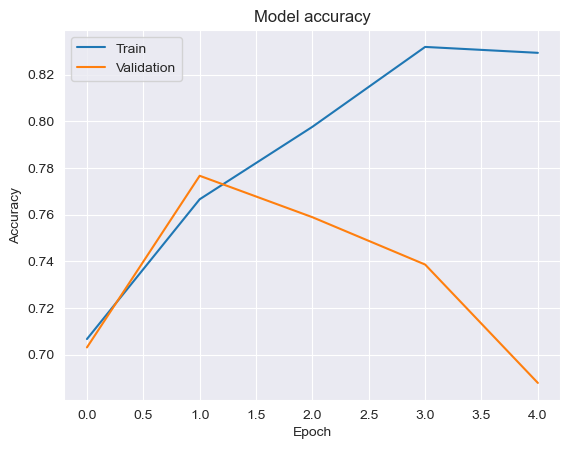

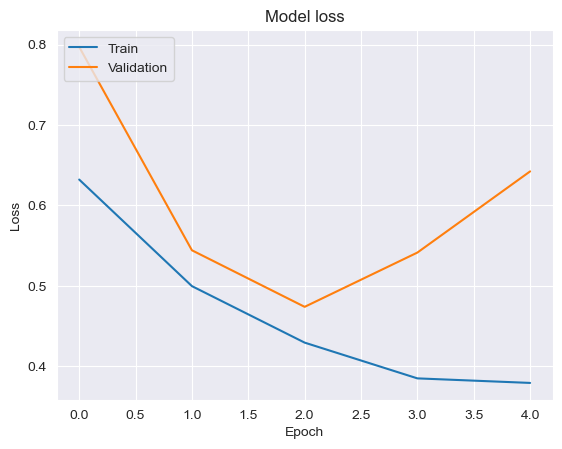

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [65]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step


In [66]:
from sklearn.metrics import classification_report

report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       198
           1       0.78      0.95      0.85       197

    accuracy                           0.84       395
   macro avg       0.86      0.84      0.84       395
weighted avg       0.86      0.84      0.84       395



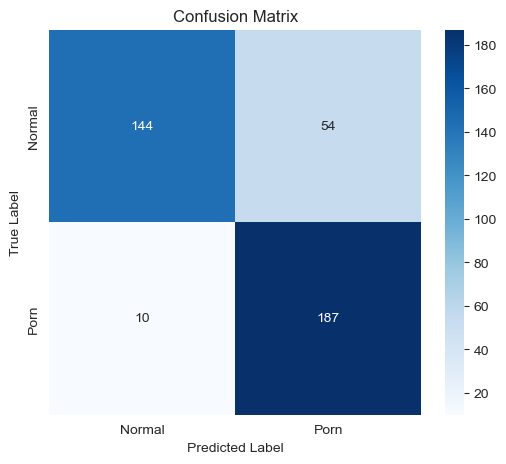

In [67]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Porn'], yticklabels=['Normal', 'Porn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [68]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, BatchNormalization,
                                     GaussianNoise, Input, Reshape)
from tensorflow.keras.optimizers import Adam

class DifferentialAttention(tf.keras.layers.Layer):
    def __init__(self, num_heads, key_dim):
        super(DifferentialAttention, self).__init__()
        self.num_heads = num_heads
        self.key_dim = key_dim
        
    def build(self, input_shape):
        self.query_dense = tf.keras.layers.Dense(self.key_dim)
        self.key_dense = tf.keras.layers.Dense(self.key_dim)
        self.value_dense = tf.keras.layers.Dense(self.key_dim)

    def call(self, x):
        Q = self.query_dense(x)
        K = self.key_dense(x)
        V = self.value_dense(x)
        
        attention_scores = tf.einsum('...ij,...kj->...ik', Q, K)
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)
        
        sparse_attention = attention_scores * tf.cast((attention_scores > tf.reduce_mean(attention_scores)), tf.float32)
        
        output = tf.einsum('...ij,...jk->...ik', sparse_attention, V)
        
        return output

def create_xception_model(input_shape):
    inputs = Input(shape=input_shape)
    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    height, width, channels = 7, 7, 2048  
    x = Reshape((height * width, channels))(x)

    attention_output = DifferentialAttention(num_heads=8, key_dim=channels)(x)
    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(1, activation='sigmoid')(x)  

    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 54s 1us/step


In [69]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 118s 571ms/step - accuracy: 0.6302 - loss: 0.6780 - val_accuracy: 0.7234 - val_loss: 0.6427
Epoch 2/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 116s 582ms/step - accuracy: 0.7135 - loss: 0.5590 - val_accuracy: 0.7386 - val_loss: 0.5390
Epoch 3/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 115s 579ms/step - accuracy: 0.7348 - loss: 0.5256 - val_accuracy: 0.7132 - val_loss: 0.5292
Epoch 4/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 116s 583ms/step - accuracy: 0.7624 - loss: 0.4610 - val_accuracy: 0.7005 - val_loss: 0.5490
Epoch 5/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 116s 587ms/step - accuracy: 0.8139 - loss: 0.4018 - val_accuracy: 0.7259 - val_loss: 0.5958


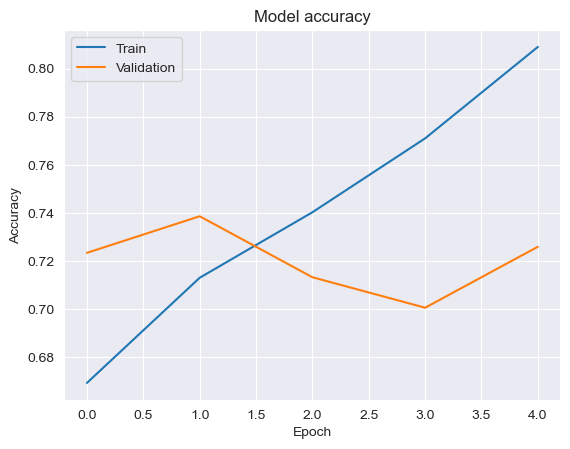

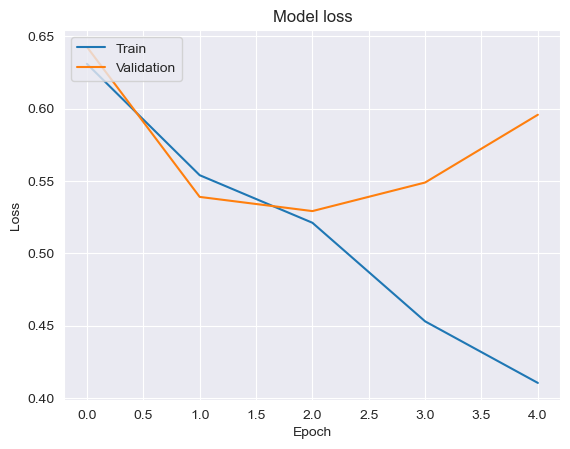

In [70]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [71]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 504ms/step


In [72]:
from sklearn.metrics import classification_report

report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       198
           1       0.78      0.73      0.75       197

    accuracy                           0.76       395
   macro avg       0.76      0.76      0.76       395
weighted avg       0.76      0.76      0.76       395



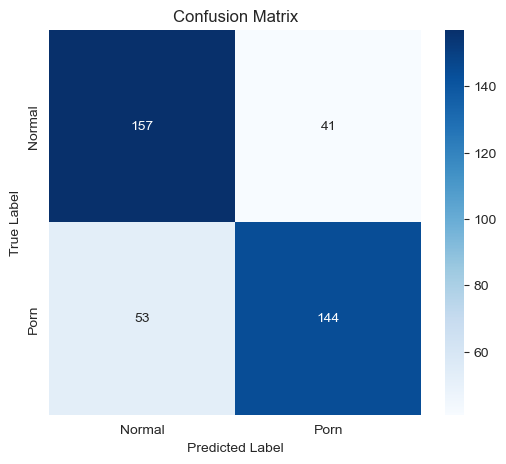

In [73]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Porn'], yticklabels=['Normal', 'Porn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

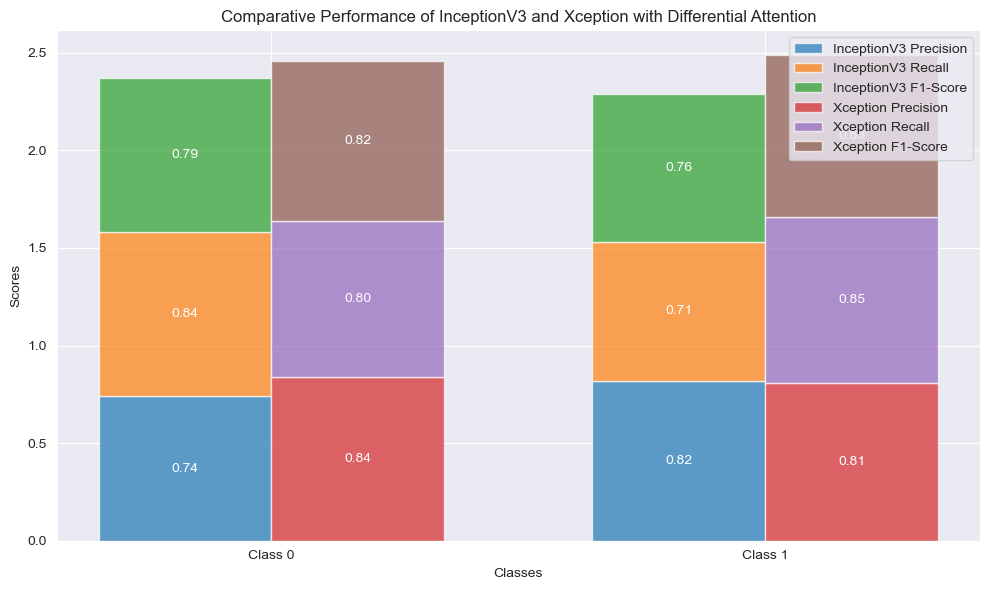

In [74]:
inception_metrics = {
    'Precision': [0.74, 0.82],
    'Recall': [0.84, 0.71],
    'F1-Score': [0.79, 0.76]
}

xception_metrics = {
    'Precision': [0.84, 0.81],
    'Recall': [0.80, 0.85],
    'F1-Score': [0.82, 0.83]
}

labels = ['Class 0', 'Class 1']

bar_width = 0.35

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - bar_width/2, inception_metrics['Precision'], width=bar_width, label='InceptionV3 Precision', alpha=0.7)
ax.bar(x - bar_width/2, inception_metrics['Recall'], width=bar_width, label='InceptionV3 Recall', alpha=0.7, bottom=inception_metrics['Precision'])
ax.bar(x - bar_width/2, inception_metrics['F1-Score'], width=bar_width, label='InceptionV3 F1-Score', alpha=0.7, bottom=np.array(inception_metrics['Precision']) + np.array(inception_metrics['Recall']))

ax.bar(x + bar_width/2, xception_metrics['Precision'], width=bar_width, label='Xception Precision', alpha=0.7)
ax.bar(x + bar_width/2, xception_metrics['Recall'], width=bar_width, label='Xception Recall', alpha=0.7, bottom=xception_metrics['Precision'])
ax.bar(x + bar_width/2, xception_metrics['F1-Score'], width=bar_width, label='Xception F1-Score', alpha=0.7, bottom=np.array(xception_metrics['Precision']) + np.array(xception_metrics['Recall']))

for i in range(len(labels)):
    ax.text(i - bar_width/2, inception_metrics['Precision'][i] / 2, f"{inception_metrics['Precision'][i]:.2f}", ha='center', va='center', color='white')
    ax.text(i - bar_width/2, inception_metrics['Precision'][i] + inception_metrics['Recall'][i] / 2, f"{inception_metrics['Recall'][i]:.2f}", ha='center', va='center', color='white')
    ax.text(i - bar_width/2, inception_metrics['Precision'][i] + inception_metrics['Recall'][i] + inception_metrics['F1-Score'][i] / 2, f"{inception_metrics['F1-Score'][i]:.2f}", ha='center', va='center', color='white')
    
    ax.text(i + bar_width/2, xception_metrics['Precision'][i] / 2, f"{xception_metrics['Precision'][i]:.2f}", ha='center', va='center', color='white')
    ax.text(i + bar_width/2, xception_metrics['Precision'][i] + xception_metrics['Recall'][i] / 2, f"{xception_metrics['Recall'][i]:.2f}", ha='center', va='center', color='white')
    ax.text(i + bar_width/2, xception_metrics['Precision'][i] + xception_metrics['Recall'][i] + xception_metrics['F1-Score'][i] / 2, f"{xception_metrics['F1-Score'][i]:.2f}", ha='center', va='center', color='white')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Comparative Performance of InceptionV3 and Xception with Differential Attention')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()